# Probability distributions

<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right">

This notebook is an element of the [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/). 
 
Author: Eric Marsden <eric.marsden@risk-engineering.org>

---

This notebook contains an introduction to the use of [SciPy](https://www.scipy.org/) library's support for various probability distributions. The [library documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) is available online. We also show how the [SymPy library](https://sympy.org/) for symbolic mathematics can be used to calculate various statistical properties analytically. Visit the [associated course materials](https://risk-engineering.org/statistical-modelling/) for background material and to download this content as a Python notebook.

In [1]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["svg"]

## Uniform distribution

Let’s generate 5 random variates from a continuous uniform distribution between 90 and 100 (the first argument to the `scipy.stats.uniform` function is the lower bound, and the second argument is the width). The object `u` will contain the “frozen distribution”.

In [2]:
u = scipy.stats.uniform(90, 10)
u.rvs(5)

array([91.85688457, 90.87813946, 95.49755923, 94.21517598, 95.77316387])

Let’s check that the expected value of the distribution is around 95.

In [3]:
u.rvs(1000).mean()

94.96971154289815

Let’s check that around 20% of the variates are less than 92.

In [4]:
(u.rvs(1000) < 92).sum() / 1000.0

0.227

We can also use the `stats` module of the [SymPy](https://sympy.org/) library to obtain the same information using an analytical (rather than stochastic) method.

In [5]:
import sympy.stats

u = sympy.Symbol("u")
u = sympy.stats.Uniform(u, 90, 100)
# generate one random variate
sympy.stats.sample(u)

90.3783207568647

Check that the expected value (the mean of the distribution) is 95.

In [6]:
sympy.stats.E(u)

95

The probability of a random variate being less than 92:

In [7]:
sympy.stats.P(u < 92)

1/5

## Gaussian distribution

Consider a Gaussian (normal) distribution centered in 5, with a standard deviation of 1.

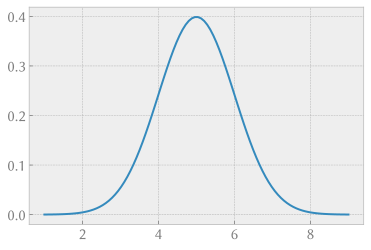

In [8]:
norm = scipy.stats.norm(5, 1)
x = numpy.linspace(1, 9, 100)
plt.plot(x, norm.pdf(x));

In [9]:
norm.mean()

5.0

Check that half the distribution is located to the left of 5.

In [10]:
norm.cdf(5)

0.5

In [11]:
norm.ppf(0.5)

5.0

Find the first percentile of the distribution (the value of $x$ which has 1% of realizations to the left). Check that it is also equal to the 99% survival quantile.

In [12]:
norm.ppf(0.01)

2.6736521259591592

In [13]:
norm.isf(0.99)

2.6736521259591592

In [14]:
norm.cdf(norm.isf(0.99))

0.01

We can also execute some calculations on the normal distribution analytically, using the SymPy library. This provides computer algebra capabilities similar to (though currently less powerful  than) the commercial tools Mathematica and Maple. 

In [15]:
z = sympy.Symbol("z")
Norm = sympy.stats.Normal(z, 5, 1)
sympy.stats.density(Norm)(z)

sqrt(2)*exp(-(z - 5)**2/2)/(2*sqrt(pi))

In [16]:
# we ask for the evaluation to 30 significant figures
sympy.stats.density(Norm)(4).evalf(40)

0.2419707245191433497978301929355606548287

In [17]:
norm.pdf(4)

0.24197072451914337

In [18]:
# check that half of our distribution is greater than 5 (this is equivalent to the CDF(5))
sympy.stats.P(Norm > 5)

1/2

In [19]:
# check that the expected value (the mean) is 5
sympy.stats.E(Norm)

5

In [20]:
# check that the standard deviation is 1
sympy.stats.std(Norm)

1

In [21]:
# generate one random variate from the distribution
sympy.stats.sample(Norm)

6.11352740099002

In [22]:
# calculate the first percentile (the 0.01 quantile) -- this requires Sympy version 1.5
sympy.stats.quantile(Norm)(0.01).evalf(30)

2.67365212595915925989391330587

In [23]:
# compare with the value calculated by numpy
norm.ppf(0.01)

2.6736521259591592

## Central limit theorem

The central limit theorem states that the mean of a set of random measurements will tend to a normal distribution, no matter the shape of the original measurement distribution. The property is also true of the sum of a set of random measurements. Let's test that in Python, simulating measurements from a uniform distribution between 30 and 40.

Procedure: take 100 measurements from the $U(30, 40)$ distribution, and calculate their mean. Repeat this 10000 times and plot a histogram of the means, which should be normally distributed.

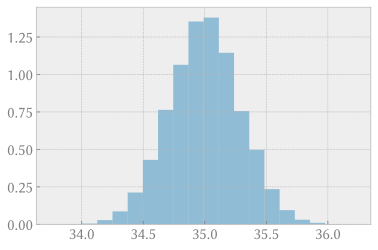

In [24]:
N = 10000
sim = numpy.zeros(N)
for i in range(N):
    sim[i] = numpy.random.uniform(30, 40, 100).mean()
plt.hist(sim, bins=20, alpha=0.5, density=True);

**Exercise**: try this with other probability distributions.

## Exponential distribution

The exponential distribution is often used in reliability engineering to represent failure of equipment which is not exposed to wear. The **hazard function**, or failure rate, of the exponential distribution is constant, equal to $\lambda$. Let's check the property that the expected value (or mean) of an exponential random variable is $\frac{1}{\lambda}$.

In [25]:
lbda = 25
obs = scipy.stats.expon(scale=1/float(lbda)).rvs(size=1000)
# the mean of 1000 random variates from the exponential distribution 
obs.mean()

0.041653180277278996

In [26]:
1/float(lbda)

0.04

Indeed, those are quite close! Let’s check another property of the exponential distribution: that the variance is equal to $\lambda^{-2}$.

In [27]:
obs.var()

0.0018636918057768205

In [28]:
1/float(lbda)**2

0.0016

And of course since the standard deviation is the square root of the variance, it should be equal to the expected value.

In [29]:
obs.std()

0.043170496936876

As previously, we can also check these properties analytically, using the SymPy symbolic mathematics library, starting with the expected value:

In [30]:
exp = sympy.Symbol("exp")
exp = sympy.stats.Exponential(exp, lbda)
sympy.stats.E(exp)

1/25

In [31]:
# now check that the variance is lambda ^ -2
sympy.stats.variance(exp) - lbda**-2

0

In [32]:
# check that the standard deviation is equal to the expectation
sympy.stats.std(exp) - sympy.stats.E(exp)

0